### Hàm mất mát 
$$\begin{eqnarray}
J(\mathbf{W}; \mathbf{X}, \mathbf{Y}) = -\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(a_{ji}) \newline
= -\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log\left(\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i)}{\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)}\right)
\end{eqnarray}$$
### Đạo hàm hàm mất mát
$$\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = \sum_{i=1}^N \mathbf{x}_i\mathbf{e}_i^T = \mathbf{X}\mathbf{E}^T$$\
$$\mathbf{E} = \mathbf{A - Y}$$
Trong đó $A = softmax(W^T.X)$
### Công thức cập nhật Gradient
$$\mathbf{W} = \mathbf{W} +\eta \mathbf{x}_{i}(\mathbf{y}_i - \mathbf{a}_i)^T$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stable_softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = e_Z / np.sum(e_Z, axis=0)
    return A

In [3]:
def cost(X, Y, W): # hàm mất mát
    A = np.dot(W.T, Y)
    return -np.sum(Y*np.log(A))

In [4]:
def grad(X, Y, W):
    A = np.dot(W.T, X)
    E = A - Y
    return np.dot(X, E.T)

In [5]:
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g

In [6]:
from scipy import sparse
def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y),
                            (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

In [7]:
def softmax_regression(X, y, W_init, eta, tol=1e-4):
    W = [W_init]
    C = W_init.shape[1]
    d, N = X.shape
    Y = convert_labels(y, C)
    
    check_W_after, count = 20, 0
    while count < 10000:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = stable_softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*np.dot(xi, (yi - ai).T)
            count += 1
            
            if count % check_W_after == 0:
                if np.linalg.norm(W_new - W[-1]) < tol:
                    break;
            W.append(W_new)
    return W

## Tạo dữ liệu cho phân loại

In [8]:
import numpy as np
np.random.seed(11)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
C = 3
 # X la ma tran cot
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis=0).T
X = np.vstack((np.ones((1, 3*N)), X))
y = np.asarray([0]*N + [1]*N + [2]*N).T

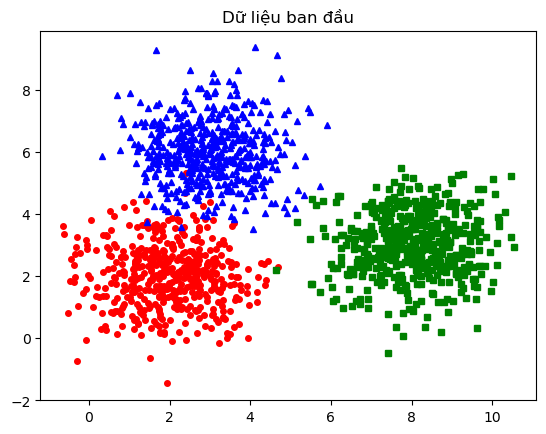

In [9]:
# hien thi
import matplotlib.pyplot as plt
def display(X, labels, title):
    X0 = X[:, labels==0]
    X1 = X[:, labels==1]
    X2 = X[:, labels==2]
    plt.plot(X0[0, :], X0[1, :], 'ro', markersize=4)
    plt.plot(X1[0, :], X1[1, :], 'gs', markersize=4)
    plt.plot(X2[0, :], X2[1, :], 'b^', markersize=4)
    plt.title(title)
    plt.show()
display(X[1:,], y, 'Dữ liệu ban đầu')

In [10]:
W_init = np.random.randn(X.shape[0], C)
W_init

array([[-2.81482707, -0.03410119,  0.28894102],
       [-0.21171968, -1.8396992 , -0.18206054],
       [ 0.77551572,  0.13016939, -1.4716428 ]])

In [11]:
W = softmax_regression(X, y, W_init, 0.05)
W[-1]

array([[ 7.09293431, -4.62383904, -5.0290825 ],
       [-1.6893419 ,  0.84561278, -1.38975031],
       [-1.12966798, -1.23442069,  1.79813097]])

In [12]:
def pred(X, W):
    A = stable_softmax(np.dot(W.T, X))
    return np.argmax(A, axis=0)

In [13]:
y_pred = pred(X, W[-1])
y_pred

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

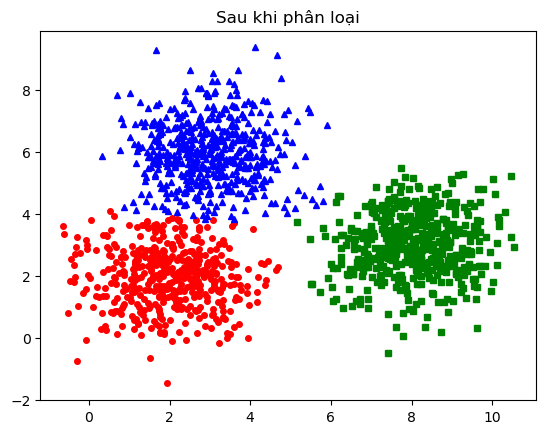

In [14]:
display(X[1:,], y_pred, 'Sau khi phân loại')

# Sử dụng thư viện scikit-learn
Softmax regression được cài đặt trong `LogisticRegression` với 2 thuộc tính bổ sung là `solver='lbfgs'` và `multi_class='multinomial'`

In [15]:
from sklearn.linear_model import LogisticRegression
X_lib = X = np.concatenate((X0, X1, X2), axis=0)
y_lib = np.asarray([0]*N + [1]*N + [2]*N).T
model = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
model.fit(X_lib, y_lib)

LogisticRegression(C=100000.0, multi_class='multinomial')

In [18]:
y_pred_lib = model.predict(X_lib)

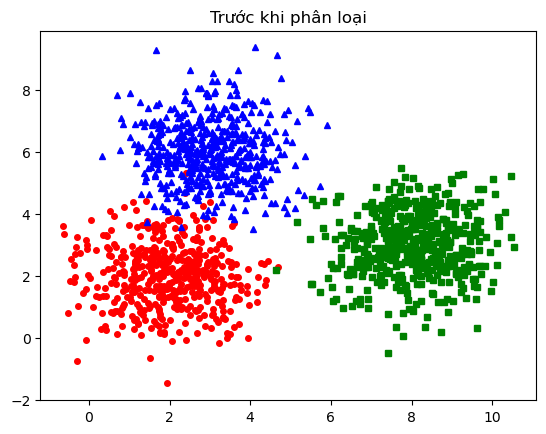

In [17]:
display(X.T, y_lib, 'Trước khi phân loại')

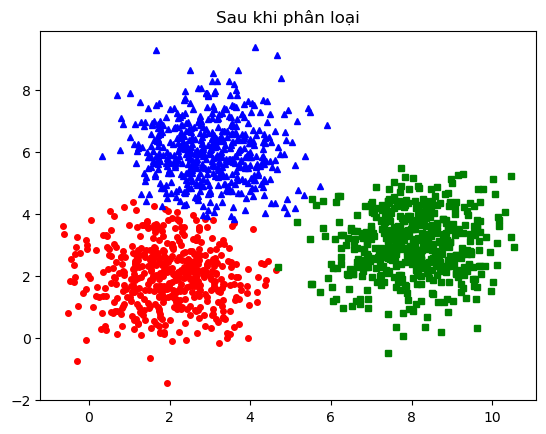

In [19]:
display(X_lib.T, y_pred_lib, 'Sau khi phân loại')